In [3]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
random_state = 6
np.random.seed(random_state)

In [4]:
## look data with pandas
train_file = "data/rupturemodel_train.txt"
val_file = "data/rupturemodel_xvalidate.txt"
test_file = "data/rupturemodel_test.txt"

df_train= pd.read_csv(train_file, sep=" ", header = None)
df_val= pd.read_csv(val_file, sep=" ", header = None)
df_test= pd.read_csv(test_file, sep=" ", header = None)

coloumns =  ['height', 'width', 'sxx', 'sxy', 'syy', 'sdrop', 'mud', 'dc', 'value']
df_train.columns = coloumns
df_val.columns = coloumns
df_test.columns = coloumns

In [5]:
from keras.utils import to_categorical

mms = StandardScaler()
X_train = mms.fit_transform(df_train.drop('value', axis=1))
Y_train = to_categorical(df_train['value'].values)

X_val = mms.fit_transform(df_val.drop('value', axis=1))
Y_val = to_categorical(df_val['value'].values)

X_test = mms.fit_transform(df_test.drop('value', axis=1))
Y_test = to_categorical(df_test['value'].values)

Using TensorFlow backend.


In [6]:
pca = PCA()
pca_result = pca.fit_transform(X_train)
df_train['pca_one'] = pca_result[:,0]
df_train['pca_two'] = pca_result[:,1]
df_train['pca_three'] = pca_result[:,2]

In [7]:
print (pca.explained_variance_ratio_)
df_train.head(10)

[ 0.34770218  0.21783746  0.1575743   0.12586459  0.09063319  0.04896274
  0.0086131   0.00281244]


,height,width,sxx,sxy,syy,sdrop,mud,dc,value,pca_one,pca_two,pca_three
0,0.103861,1.145663,-102.509086,58.619371,-117.766562,0.483821,0.216681,0.295842,0.0,1.509555,-1.087108,-0.476050
1,0.088714,1.304360,-136.062270,51.391037,-126.715571,0.345944,0.447964,0.406466,1.0,1.450957,1.625312,-0.117258
2,0.099706,1.260377,-117.558936,40.972081,-115.529343,0.292719,0.501697,0.389360,1.0,0.678498,2.287421,0.053599
3,0.115749,1.191782,-128.169036,94.020712,-157.830504,0.571710,0.202831,0.408976,0.0,3.469532,-1.778820,-0.368415
4,0.017900,1.108150,-106.350320,29.148969,-101.379323,0.253122,0.324653,0.398592,1.0,0.032589,1.320258,-1.689894
5,0.023810,1.809335,-133.284598,57.838478,-118.675571,0.479884,0.291608,0.418983,0.0,1.763854,-0.432120,-0.086107
6,0.134961,1.500619,-132.884625,78.405717,-135.344837,0.546107,0.239262,0.355863,0.0,2.783205,-1.364849,0.774480
7,0.058512,1.000214,-56.703078,15.261712,-67.674971,0.216541,0.208749,0.312722,0.0,-1.314569,0.416994,-1.324004
8,0.031783,1.381646,-74.272701,20.540052,-76.573236,0.256497,0.466678,0.432876,0.0,-1.034556,2.068381,-0.656346
9,0.084483,1.178936,-140.885249,82.921414,-134.150217,0.596416,0.202142,0.395230,0.0,2.994406,-1.844693,-0.862664


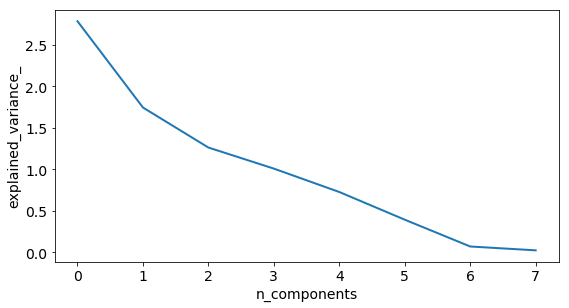

In [8]:
plt.figure(1, figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

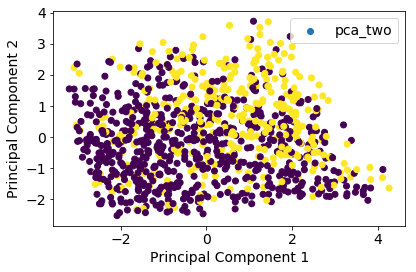

In [9]:
# df_train.plot.scatter(df_train['pca_one'], df_train['pca_two'])
plt.scatter(df_train['pca_one'], df_train['pca_two'], c=df_train['value'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.tight_layout()

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


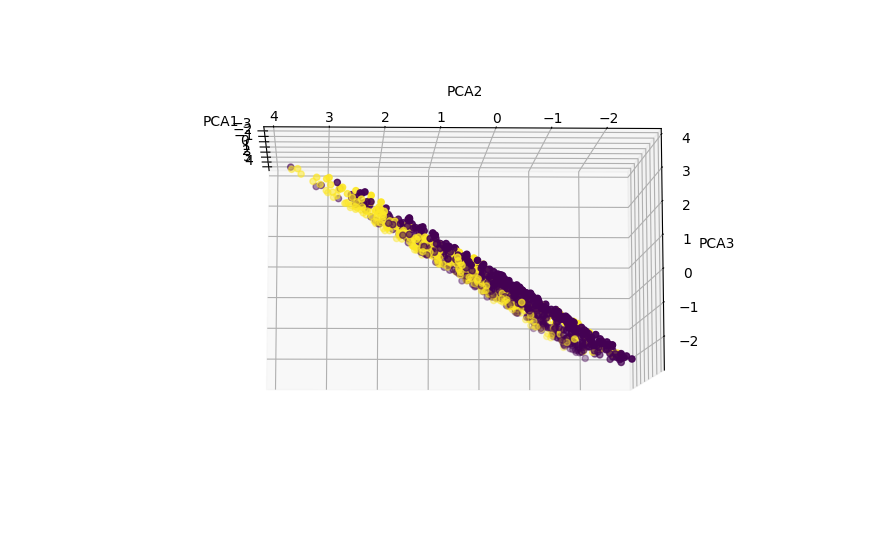

In [10]:
%matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train['pca_one'], df_train['pca_two'], df_train['pca_two'], c=df_train['value'], marker='o')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

In [11]:
PCA_data = df_train[['pca_one','pca_two', 'pca_three']]
PCA_data.head()

,pca_one,pca_two,pca_three
0,1.509555,-1.087108,-0.476050
1,1.450957,1.625312,-0.117258
2,0.678498,2.287421,0.053599
3,3.469532,-1.778820,-0.368415
4,0.032589,1.320258,-1.689894


<IPython.core.display.Javascript object>


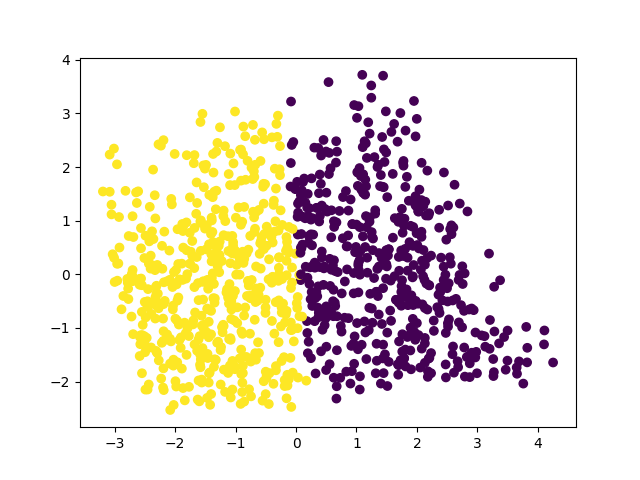

In [12]:
from sklearn import cluster, datasets
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(PCA_data)
plt.figure('K-means with 2 clusters')
plt.scatter(df_train['pca_one'], df_train['pca_two'], c=k_means.labels_)